# APPLE STORE DATASET MACHINE LEARNING ANALYSIS

The aim of this project is to analyze mobile app data to identify key factors influencing user ratings. By employing machine learning techniques, we will build a predictive model to estimate app ratings based on various features. Ultimately, this project seeks to provide insights that can help developers enhance app quality and user satisfaction.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('AppleStore.csv')

In [3]:
dataset

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1
7193,11082,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1
7194,11087,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1
7195,11089,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


In [5]:
dataset.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

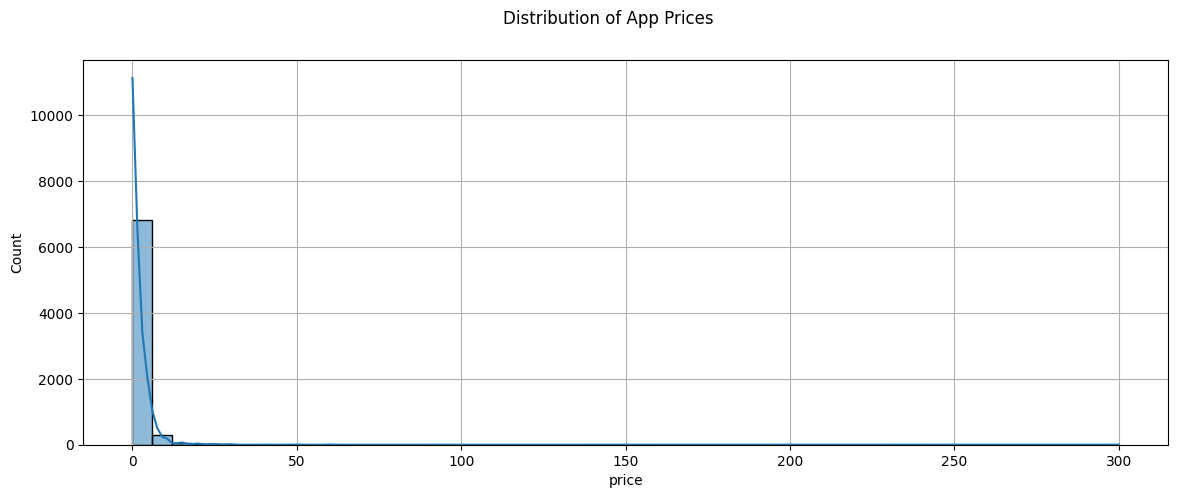

In [7]:
plt.figure(figsize=(14,5))
sns.histplot(dataset['price'], bins=50, kde=True)
plt.suptitle('Distribution of App Prices')
plt.grid()

Text(0.5, 0.98, 'Distribution of User Ratings')

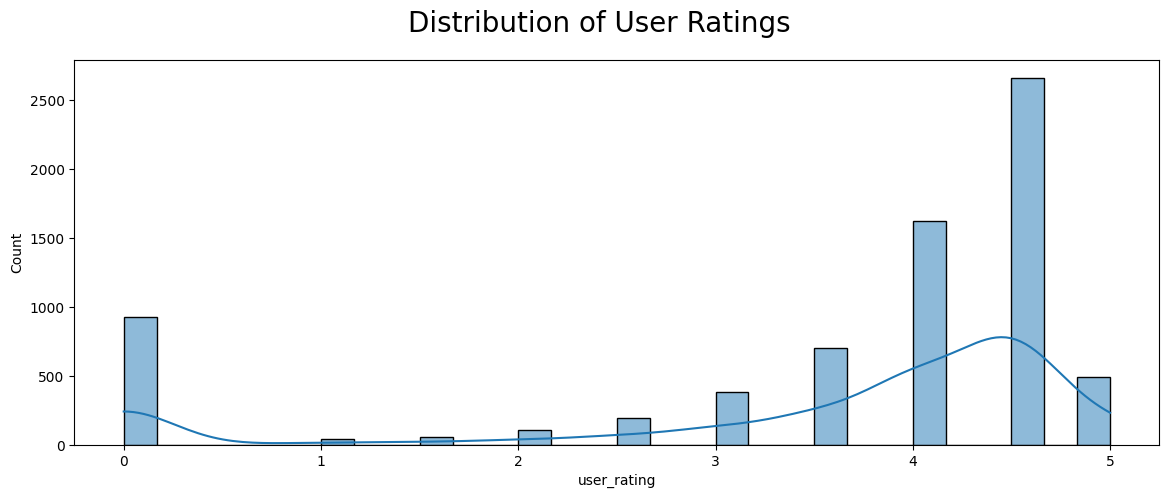

In [8]:
plt.figure(figsize=(14,5))
sns.histplot(dataset['user_rating'], bins=30, kde=True)
plt.suptitle('Distribution of User Ratings',fontsize=20)

Text(0.5, 0.98, 'Distribution of App Genres')

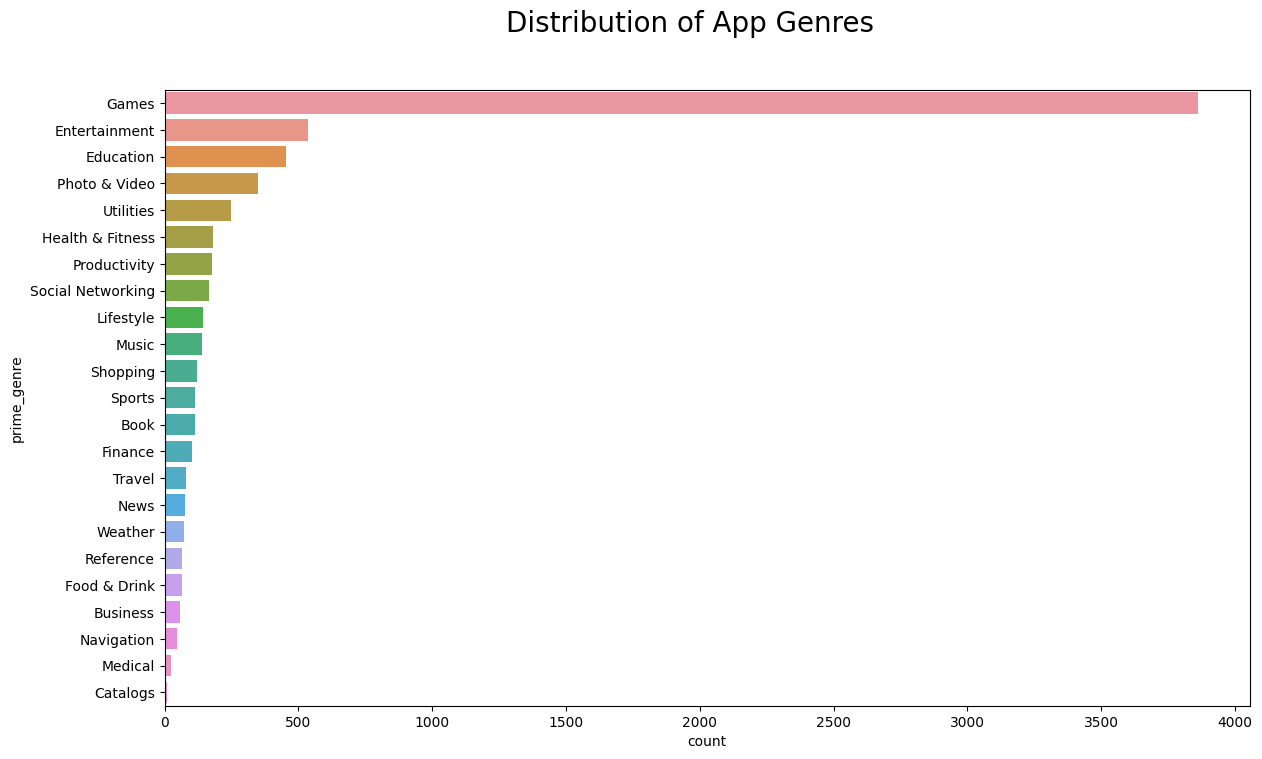

In [11]:
plt.figure(figsize=(14, 8))
sns.countplot(y=dataset['prime_genre'], order=dataset['prime_genre'].value_counts().index)
plt.suptitle('Distribution of App Genres',fontsize=20)

Text(0.5, 0.98, 'Price vs User Rating')

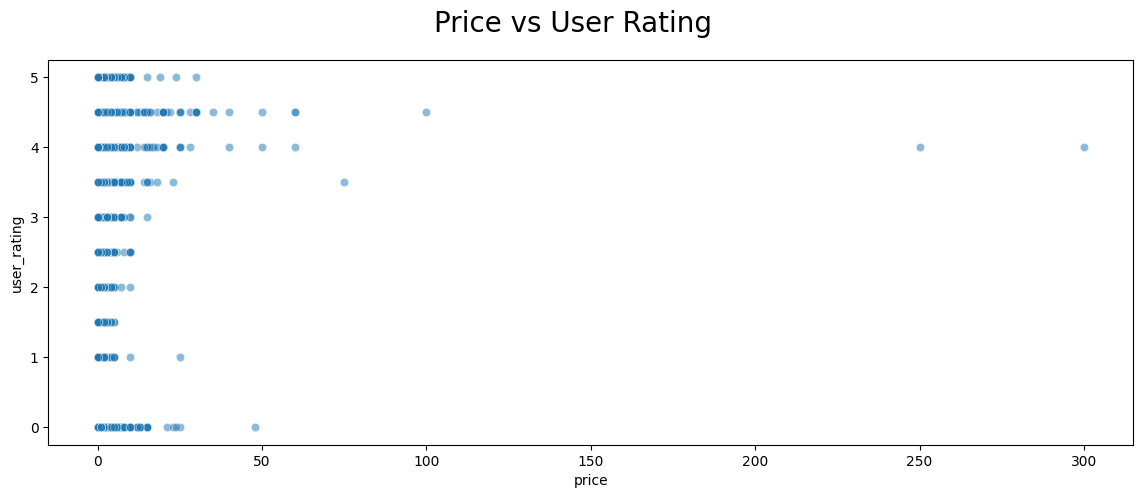

In [12]:
plt.figure(figsize=(14,5))
sns.scatterplot(data=dataset, x='price', y='user_rating', alpha=0.5)
plt.suptitle('Price vs User Rating',fontsize=20)

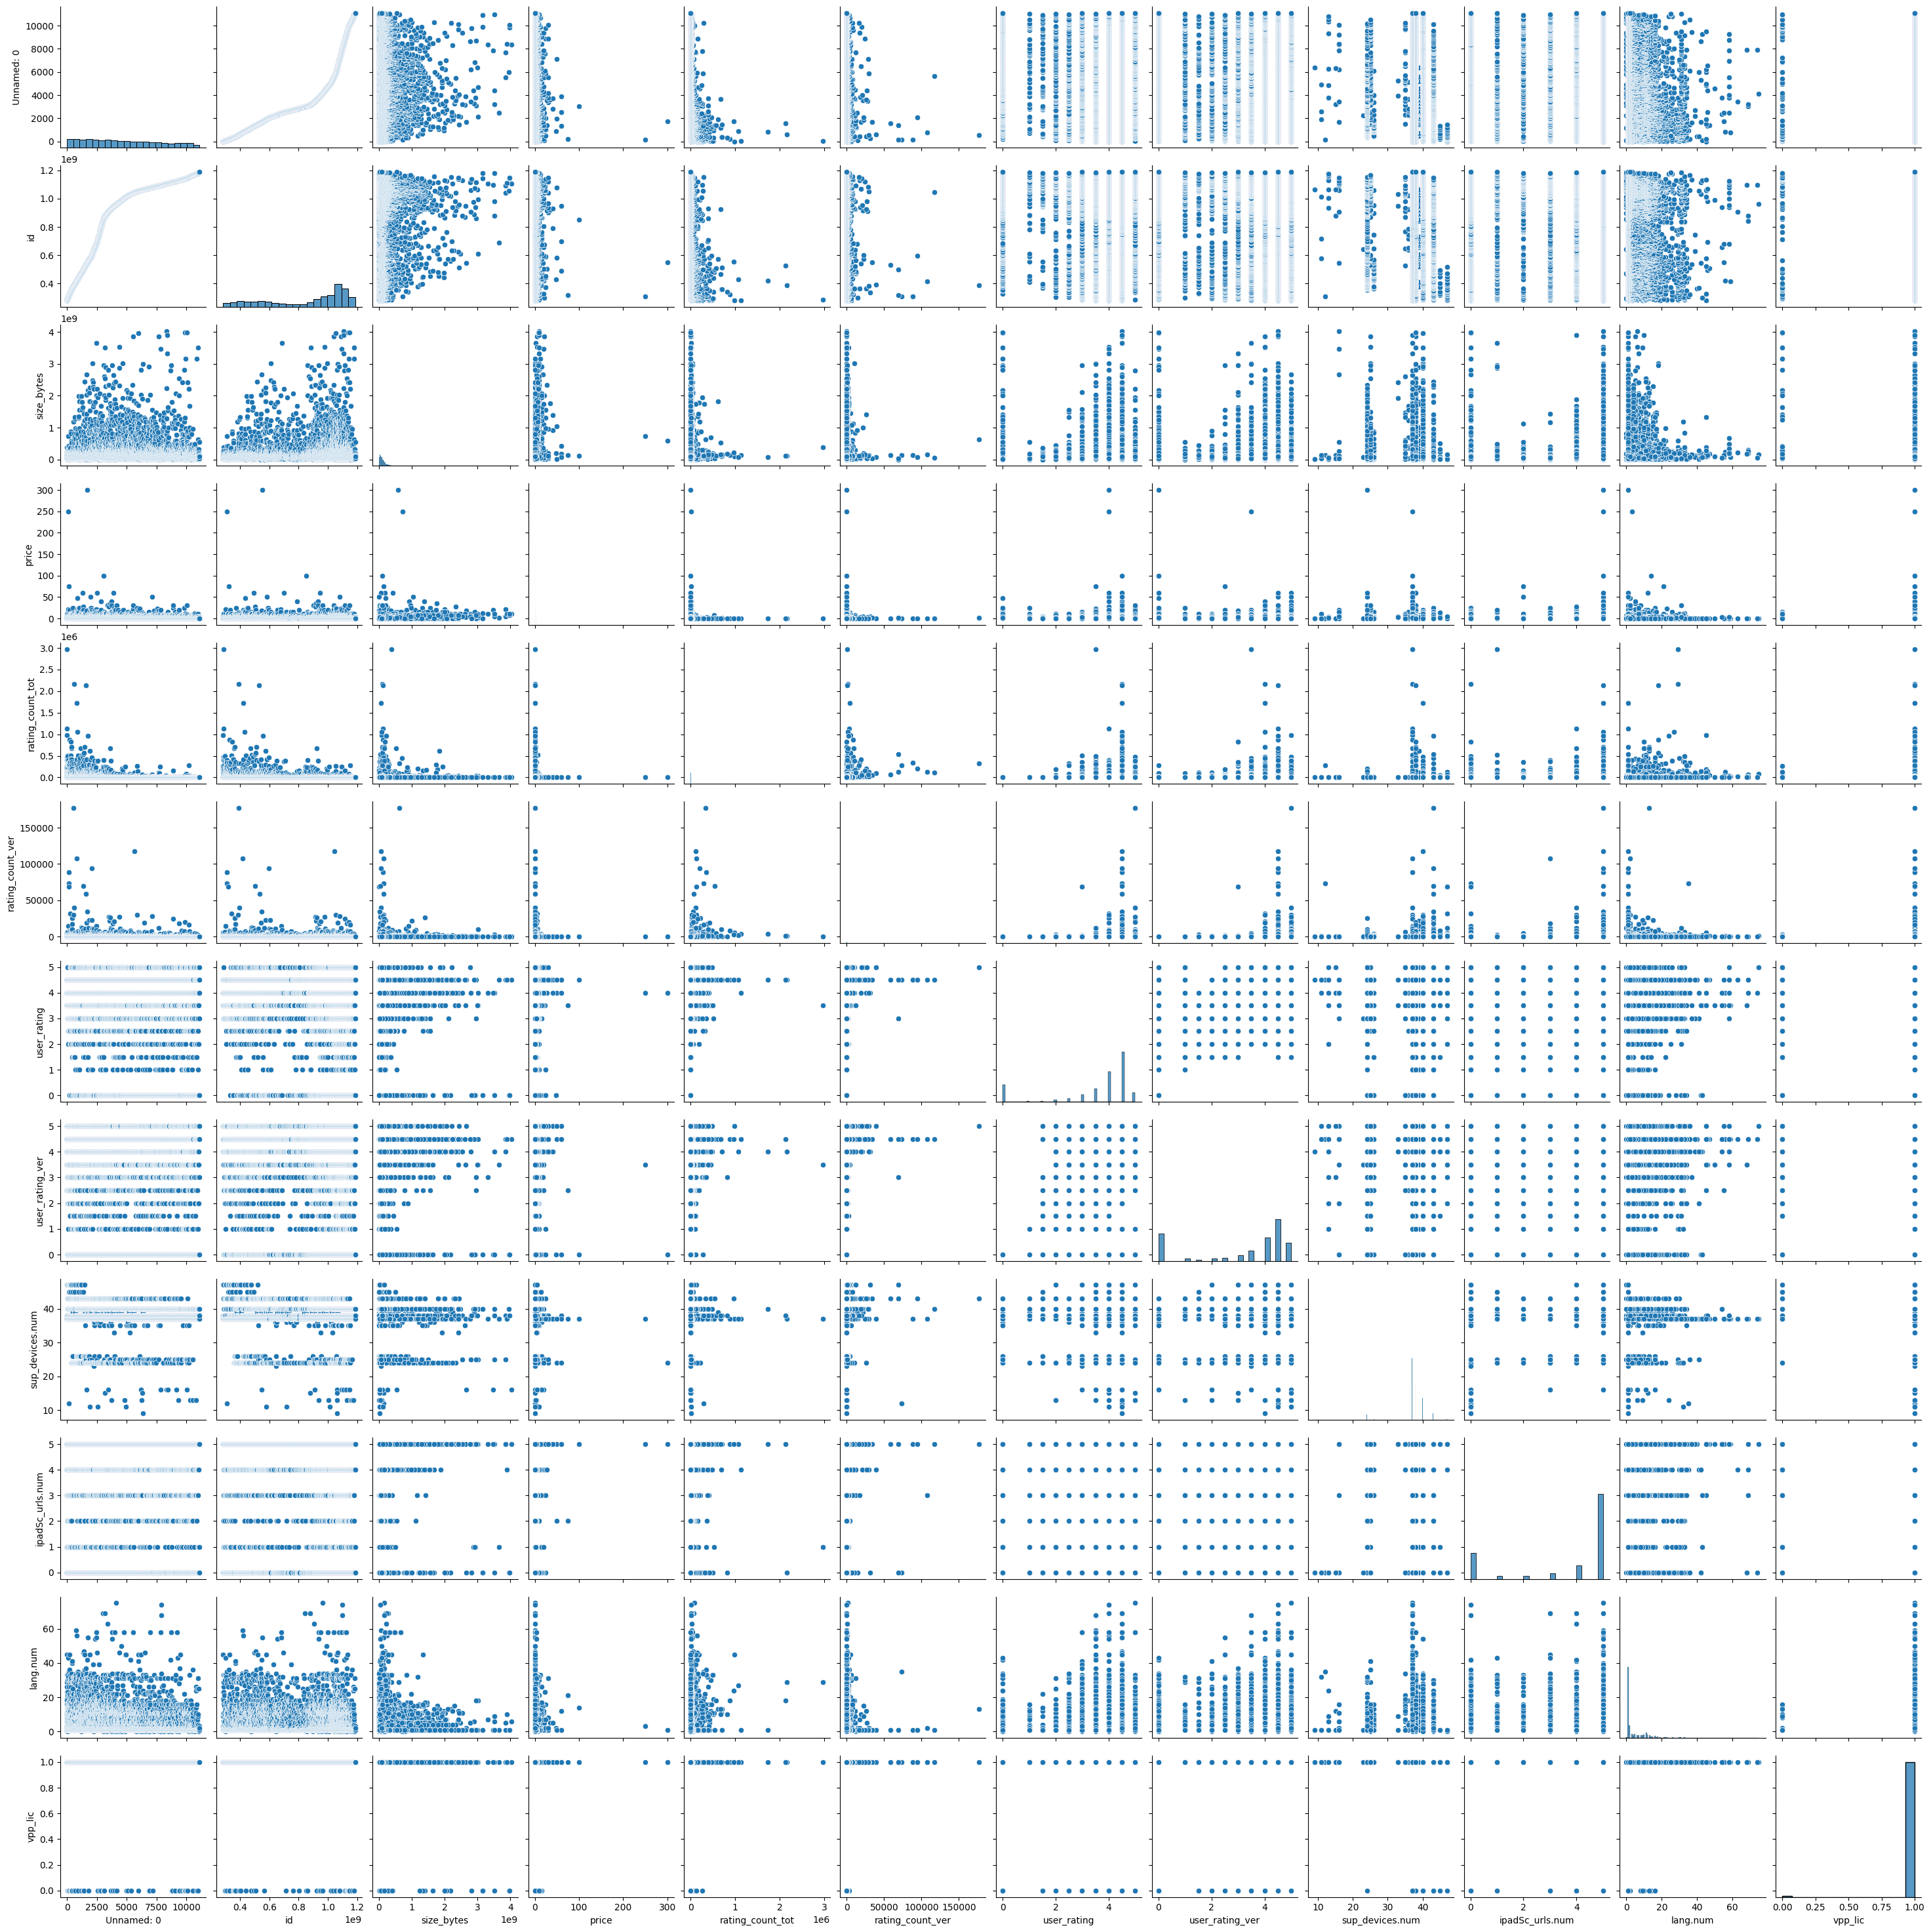

In [13]:
sns.pairplot(dataset)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14192\2516181483.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')


Text(0.5, 0.98, 'Correlation Heatmap')

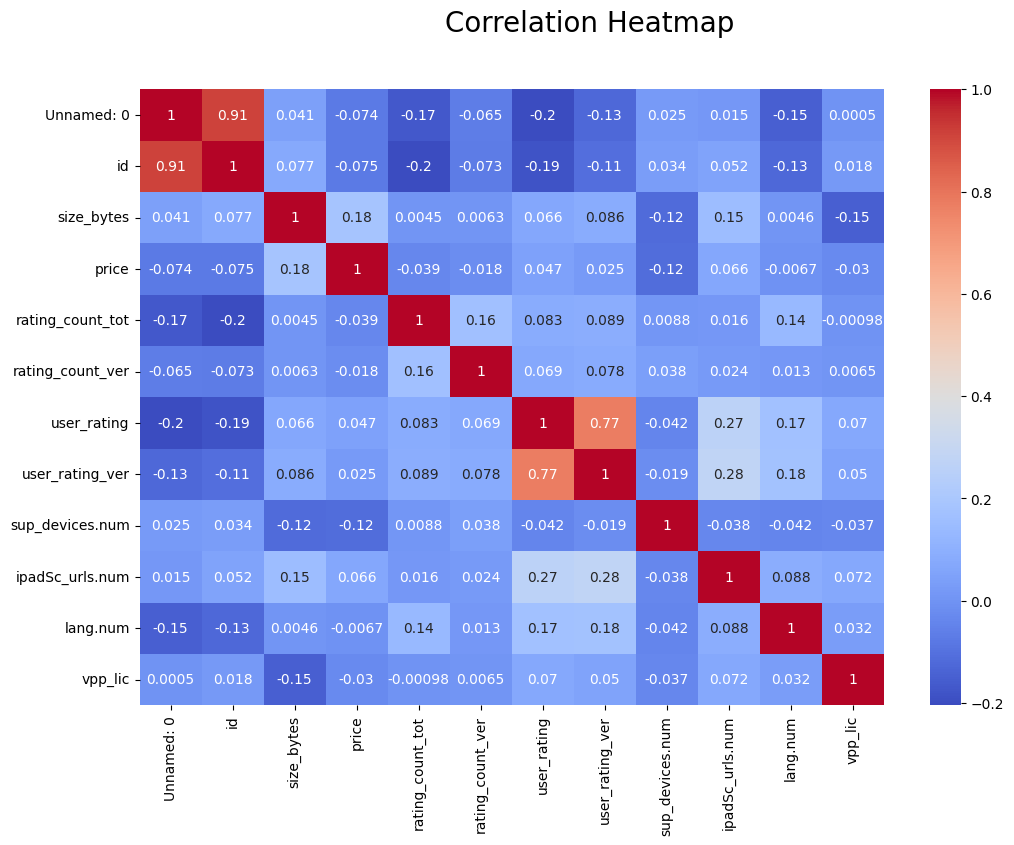

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.suptitle('Correlation Heatmap',fontsize=20)

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [16]:
label=LabelEncoder()
scale=StandardScaler()

In [17]:
dataset['track_name']=label.fit_transform(dataset['track_name'])
dataset['currency']=label.fit_transform(dataset['currency'])
dataset['ver']=label.fit_transform(dataset['ver'])
dataset['cont_rating']=label.fit_transform(dataset['cont_rating'])
dataset['prime_genre']=label.fit_transform(dataset['prime_genre'])
dataset['Unnamed: 0']=scale.fit_transform(dataset['Unnamed: 0'].values.reshape(-1,1))
dataset['id']=scale.fit_transform(dataset['id'].values.reshape(-1,1))
dataset['size_bytes']=scale.fit_transform(dataset['size_bytes'].values.reshape(-1,1))
dataset['price']=scale.fit_transform(dataset['price'].values.reshape(-1,1))
dataset['rating_count_tot']=scale.fit_transform(dataset['rating_count_tot'].values.reshape(-1,1))
dataset['rating_count_ver']=scale.fit_transform(dataset['rating_count_ver'].values.reshape(-1,1))
dataset['user_rating']=scale.fit_transform(dataset['user_rating'].values.reshape(-1,1))
dataset['user_rating_ver']=scale.fit_transform(dataset['user_rating_ver'].values.reshape(-1,1))
dataset['sup_devices.num']=scale.fit_transform(dataset['sup_devices.num'].values.reshape(-1,1))
dataset['ipadSc_urls.num']=scale.fit_transform(dataset['ipadSc_urls.num'].values.reshape(-1,1))
dataset['lang.num']=scale.fit_transform(dataset['lang.num'].values.reshape(-1,1))
dataset['vpp_lic']=scale.fit_transform(dataset['vpp_lic'].values.reshape(-1,1))

In [18]:
x = dataset.drop(columns=['Unnamed: 0', 'id', 'track_name', 'user_rating']) 
y = dataset['user_rating']

# **Splitting the dataset**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# **Importing the machine learning model and fitting the dataset**

In [21]:
#Importing the machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [22]:
model_1=LinearRegression()

In [23]:
model_1.fit(x_train,y_train)

LinearRegression()

In [24]:
model_1.score(x_train,y_train)

0.6025175609698838

In [25]:
y_pred_1=model_1.predict(x_test)

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,median_absolute_error

In [27]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_1))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_1))
print('R2_score',r2_score(y_test,y_pred_1))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_1))

Mean_Squared_error 0.3722276586223759
Mean_Absolute_error 0.4266629726394104
R2_score 0.6500643268766189
Median_absolute_error 0.24881204545118252


In [28]:
model_2=DecisionTreeRegressor()

In [29]:
model_2.fit(x_train,y_train)

DecisionTreeRegressor()

In [30]:
model_2.score(x_train,y_train)

1.0

In [31]:
y_pred_2=model_2.predict(x_test)

In [32]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_2))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_2))
print('R2_score',r2_score(y_test,y_pred_2))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_2))

Mean_Squared_error 0.16829757432468032
Mean_Absolute_error 0.23760583548675707
R2_score 0.8417814378052804
Median_absolute_error 5.773159728050814e-15


In [33]:
model_3=SVR()

In [34]:
model_3.fit(x_train,y_train)

SVR()

In [35]:
model_3.score(x_train,y_train)

-0.1003906135992978

In [36]:
y_pred_3=model_3.predict(x_test)

In [37]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_3))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_3))
print('R2_score',r2_score(y_test,y_pred_3))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_3))

Mean_Squared_error 1.2010447318243138
Mean_Absolute_error 0.6842800755177212
R2_score -0.12911651497830712
Median_absolute_error 0.2472366572787953


In [38]:
model_4=RandomForestRegressor()

In [39]:
model_4.fit(x_train,y_train)

RandomForestRegressor()

In [40]:
model_4.score(x_train,y_train)

0.9874493680214999

In [41]:
y_pred_4=model_4.predict(x_test)

In [42]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_4))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_4))
print('R2_score',r2_score(y_test,y_pred_4))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_4))

Mean_Squared_error 0.08697356900692844
Mean_Absolute_error 0.18438243335163254
R2_score 0.9182351077106317
Median_absolute_error 0.09882450667228344


In [43]:
model_5=KNeighborsRegressor()

In [44]:
model_5.fit(x_train,y_train)

KNeighborsRegressor()

In [45]:
model_5.score(x_train,y_train)

0.5956313585241515

In [46]:
y_pred_5=model_5.predict(x_test)

In [47]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_5))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_5))
print('R2_score',r2_score(y_test,y_pred_5))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_5))

Mean_Squared_error 0.6247547577888973
Mean_Absolute_error 0.5214212782600897
R2_score 0.4126605811265459
Median_absolute_error 0.32941502224094577


In [48]:
model_6=GradientBoostingRegressor()

In [49]:
model_6.fit(x_train,y_train)

GradientBoostingRegressor()

In [50]:
model_6.score(x_train,y_train)

0.9188438535954905

In [51]:
y_pred_6=model_6.predict(x_test)

In [52]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_6))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_6))
print('R2_score',r2_score(y_test,y_pred_6))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_6))

Mean_Squared_error 0.09170996203349079
Mean_Absolute_error 0.196606268814182
R2_score 0.9137823679866112
Median_absolute_error 0.11438290453439309


In [53]:
model_7=XGBRegressor()

In [54]:
model_7.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [55]:
model_7.score(x_train,y_train)

0.9814174097253967

In [56]:
y_pred_7=model_7.predict(x_test)

In [57]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_7))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_7))
print('R2_score',r2_score(y_test,y_pred_7))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_7))

Mean_Squared_error 0.09318427527839117
Mean_Absolute_error 0.1994150139839942
R2_score 0.912396348474632
Median_absolute_error 0.11717348492775492


# **Visualizing the training performance**

In [58]:
#Let's enter the model name and the performance detail's
model_name=['Linear_regression','Decision_tree_Regressor','SVR','Random_forest_Regressor','KNN','Gradient_boost','XGBoost']
model_train_performance=[model_1.score(x_train,y_train),model_2.score(x_train,y_train),model_3.score(x_train,y_train),model_4.score(x_train,y_train),model_5.score(x_train,y_train),model_6.score(x_train,y_train),model_7.score(x_train,y_train)]

In [59]:
print('The Training score of Linear Regression is:',model_1.score(x_train,y_train))
print('The Training score of Decision Tree is:',model_2.score(x_train,y_train))
print('The Training score of Random Forest is:',model_3.score(x_train,y_train))
print('The Training score of KNN is:',model_4.score(x_train,y_train))
print('The Training score of SVM is:',model_5.score(x_train,y_train))
print('The Training score of GradientBoost is:',model_6.score(x_train,y_train))
print('The Training score of XGBoost is:',model_7.score(x_train,y_train))

The Training score of Linear Regression is: 0.6025175609698838
The Training score of Decision Tree is: 1.0
The Training score of Random Forest is: -0.1003906135992978
The Training score of KNN is: 0.9874493680214999
The Training score of SVM is: 0.5956313585241515
The Training score of GradientBoost is: 0.9188438535954905
The Training score of XGBoost is: 0.9814174097253967


Text(0.5, 0.98, 'Training Score Of Each Model')

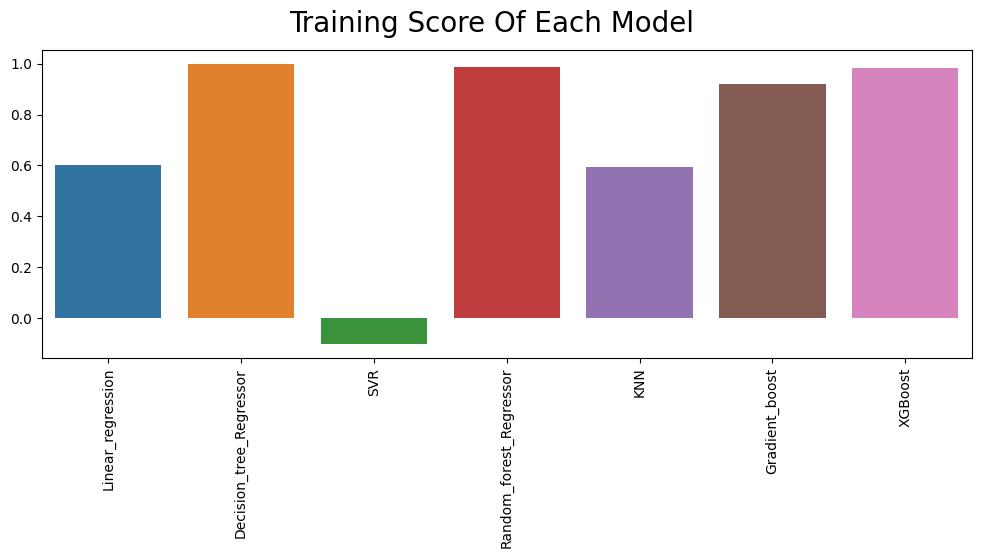

In [60]:
plt.figure(figsize=(12,4))
sns.barplot(x=model_name,y=model_train_performance)
plt.xticks(rotation=90)
plt.suptitle('Training Score Of Each Model',fontsize=20)

# **Testing performance of each model**

In [61]:
model_test_performance=[r2_score(y_test,y_pred_1),r2_score(y_test,y_pred_2),r2_score(y_test,y_pred_3),r2_score(y_test,y_pred_4),r2_score(y_test,y_pred_5),r2_score(y_test,y_pred_6),r2_score(y_test,y_pred_7)]

In [62]:
print('The Testing score of Linear Regression is:',r2_score(y_test,y_pred_1))
print('The Testing score of Decision Tree is:',r2_score(y_test,y_pred_2))
print('The Testing score of SVM is:',r2_score(y_test,y_pred_3))
print('The Testing score of Random Forest is:',r2_score(y_test,y_pred_4))
print('The Testing score of KNN is:',r2_score(y_test,y_pred_5))
print('The Testing score of GradientBoost is:',r2_score(y_test,y_pred_6))
print('The Testing score of XGBoost is:',r2_score(y_test,y_pred_7))

The Testing score of Linear Regression is: 0.6500643268766189
The Testing score of Decision Tree is: 0.8417814378052804
The Testing score of SVM is: -0.12911651497830712
The Testing score of Random Forest is: 0.9182351077106317
The Testing score of KNN is: 0.4126605811265459
The Testing score of GradientBoost is: 0.9137823679866112
The Testing score of XGBoost is: 0.912396348474632


Text(0.5, 0.98, 'Testing Score Of Each Model')

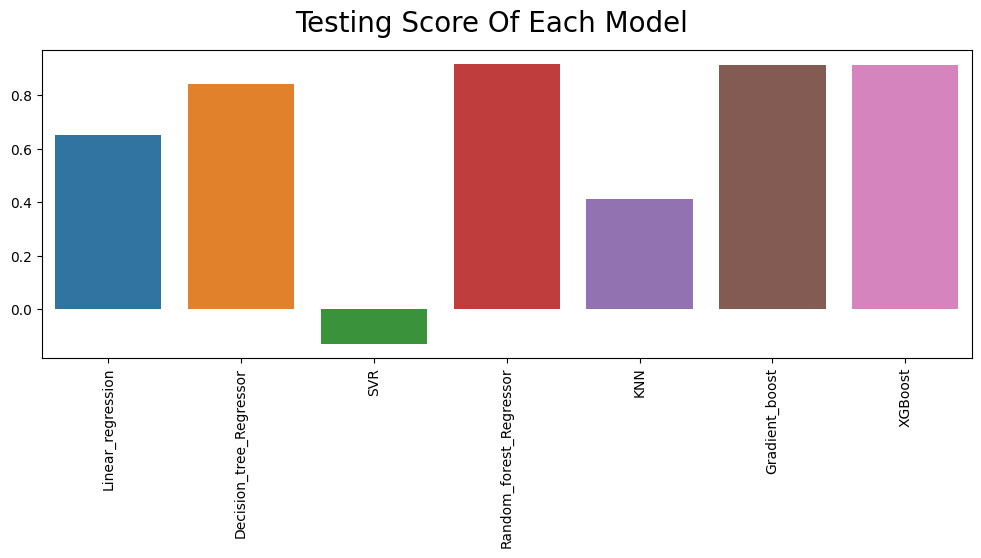

In [63]:
plt.figure(figsize=(12,4))
sns.barplot(x=model_name,y=model_test_performance)
plt.xticks(rotation=90)
plt.suptitle('Testing Score Of Each Model',fontsize=20)